[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9686274509803922, 0.9215686274509803, 0.9058823529411765, 0.9137254901960784, 0.9372549019607843, 0.9333333333333333, 0.9372549019607843, 0.9333333333333333, 0.9137254901960784, 0.9098039215686274, 0.9098039215686274, 0.9137254901960784, 0.9058823529411765, 0.9647058823529412, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9137254901960784, 0.4470588235294118, 0.403921568627

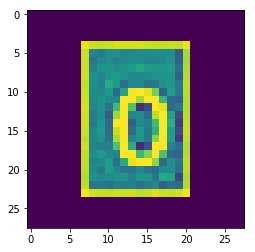

In [14]:
from PIL import Image, ImageFilter
from matplotlib import pyplot as plt


def imageprepare(argv):
    """
    This function returns the pixel values.
    The imput is a png file location.
    """
    im = Image.open(argv).convert('L')
    width = float(im.size[0])
    height = float(im.size[1])
    newImage = Image.new('L', (28, 28), (255))  # creates white canvas of 28x28 pixels

    if width > height:  # check which dimension is bigger
        # Width is bigger. Width becomes 20 pixels.
        nheight = int(round((20.0 / width * height), 0))  # resize height according to ratio width
        if (nheight == 0):  # rare case but minimum is 1 pixel
            nheight = 1
            # resize and sharpen
        img = im.resize((20, nheight), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        wtop = int(round(((28 - nheight) / 2), 0))  # calculate horizontal position
        newImage.paste(img, (4, wtop))  # paste resized image on white canvas
    else:
        # Height is bigger. Heigth becomes 20 pixels.
        nwidth = int(round((20.0 / height * width), 0))  # resize width according to ratio height
        if (nwidth == 0):  # rare case but minimum is 1 pixel
            nwidth = 1
            # resize and sharpen
        img = im.resize((nwidth, 20), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        wleft = int(round(((28 - nwidth) / 2), 0))  # caculate vertical pozition
        newImage.paste(img, (wleft, 4))  # paste resized image on white canvas

    # newImage.save("sample.png

    tv = list(newImage.getdata())  # get pixel values

    # normalize pixels to 0 and 1. 0 is pure white, 1 is pure black.
    tva = [(255 - x) * 1.0 / 255.0 for x in tv]
    print(tva)
    return tva

x=[imageprepare('./number/1.jpg')]#file path here
print(len(x))# mnist IMAGES are 28x28=784 pixels
print(x[0])
#Now we convert 784 sized 1d array to 24x24 sized 2d array so that we can visualize it
newArr=[[0 for d in range(28)] for y in range(28)]
k = 0
for i in range(28):
    for j in range(28):
        newArr[i][j]=x[0][k]
        k=k+1

for i in range(28):
    for j in range(28):
        print(newArr[i][j])
        # print(' , ')
    print('\n')


plt.imshow(newArr, interpolation='nearest')
plt.savefig('MNIST_IMAGE.png')#save MNIST image
plt.show()#Show / plot that image


In [16]:
import os
from PIL import Image
from array import *
from random import shuffle

# Load from and save to
Names = [['./training-images','train'], ['./test-images','test']]

for name in Names:
	
	data_image = array('B')
	data_label = array('B')

	FileList = []
	for dirname in os.listdir(name[0])[1:]: # [1:] Excludes .DS_Store from Mac OS
		path = os.path.join(name[0],dirname)
		for filename in os.listdir(path):
			if filename.endswith(".png"):
				FileList.append(os.path.join(name[0],dirname,filename))

	shuffle(FileList) # Usefull for further segmenting the validation set

	for filename in FileList:

		label = int(filename.split('/')[2])

		Im = Image.open(filename)

		pixel = Im.load()

		width, height = Im.size

		for x in range(0,width):
			for y in range(0,height):
				data_image.append(pixel[y,x])

		data_label.append(label) # labels start (one unsigned byte each)

	hexval = "{0:#0{1}x}".format(len(FileList),6) # number of files in HEX

	# header for label array

	header = array('B')
	header.extend([0,0,8,1,0,0])
	header.append(int('0x'+hexval[2:][:2],16))
	header.append(int('0x'+hexval[2:][2:],16))
	
	data_label = header + data_label

	# additional header for images array
	
	if max([width,height]) <= 256:
		header.extend([0,0,0,width,0,0,0,height])
	else:
		raise ValueError('Image exceeds maximum size: 256x256 pixels');

	header[3] = 3 # Changing MSB for image data (0x00000803)
	
	data_image = header + data_image

	output_file = open(name[1]+'-images-idx3-ubyte', 'wb')
	data_image.tofile(output_file)
	output_file.close()

	output_file = open(name[1]+'-labels-idx1-ubyte', 'wb')
	data_label.tofile(output_file)
	output_file.close()

# gzip resulting files

for name in Names:
	os.system('gzip '+name[1]+'-images-idx3-ubyte')
	os.system('gzip '+name[1]+'-labels-idx1-ubyte')


TypeError: 'module' object is not callable